## Simple Linear Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Matplotlib is building the font cache; this may take a moment.


In [4]:
np.random.seed(0)
size = 2 * np.random.rand(100, 1)
bedrooms = np.random.randint(1, 5, size=(100,1))
age = np.random.randint(0, 30, size=(100,1))
price = 50 + 30*size + 10*bedrooms - 2*age + np.random.randn(100, 1) * 5

data = pd.DataFrame(np.hstack((size, bedrooms, age, price)), columns = ['Size', 'Bedrooms', 'Age', 'Price'])


In [5]:
data.head()

,Size,Bedrooms,Age,Price
0,1.097627,2.0,29.0,50.688021
1,1.430379,3.0,28.0,67.601576
2,1.205527,4.0,15.0,95.426775
3,1.089766,3.0,8.0,105.112128
4,0.847310,3.0,2.0,106.278449


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Size      100 non-null    float64
 1   Bedrooms  100 non-null    float64
 2   Age       100 non-null    float64
 3   Price     100 non-null    float64
dtypes: float64(4)
memory usage: 3.2 KB


In [7]:
data.describe()

,Size,Bedrooms,Age,Price
count,100.000000,100.000000,100.000000,100.000000
mean,0.945588,2.450000,14.140000,74.829545
std,0.579508,1.157976,9.151939,29.022215
min,0.009391,1.000000,0.000000,-2.802208
25%,0.411606,1.000000,6.750000,55.192487
50%,0.934962,2.000000,14.000000,78.832073
75%,1.368967,4.000000,21.000000,95.826905
max,1.976748,4.000000,29.000000,133.061818


Text(0, 0.5, 'Price (thousands)')

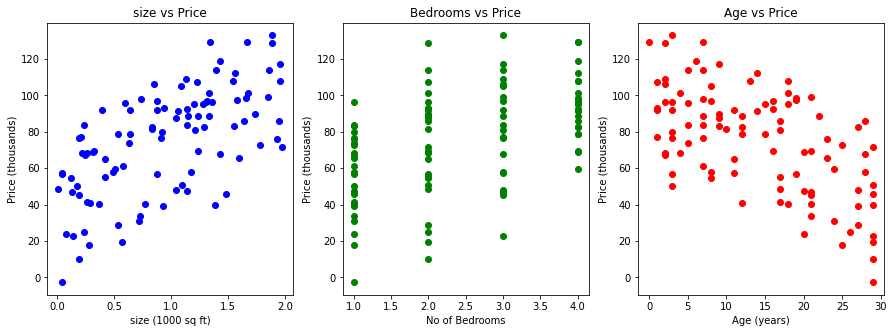

In [8]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(data['Size'], data['Price'], color='blue')
plt.title('size vs Price')
plt.xlabel('size (1000 sq ft)')
plt.ylabel('Price (thousands)')

plt.subplot(1, 3, 2)
plt.scatter(data['Bedrooms'], data['Price'], color='green')
plt.title('Bedrooms vs Price')
plt.xlabel('No of Bedrooms')
plt.ylabel('Price (thousands)')

plt.subplot(1, 3, 3)
plt.scatter(data['Age'], data['Price'], color='red')
plt.title('Age vs Price')
plt.xlabel('Age (years)')
plt.ylabel('Price (thousands)')

In [10]:
X = data[['Size', 'Bedrooms', 'Age']]
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = model.predict(X_test)

In [13]:
mse = mean_squared_error(y_test, y_pred)

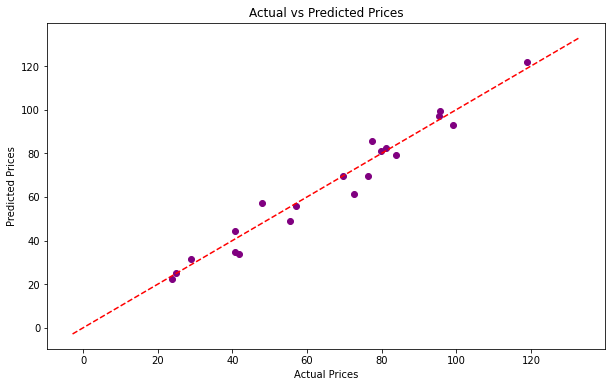

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='purple')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color = 'red', linestyle='--')
plt.show()